### Mel Spectrogram stuff

In [1]:
from librosa import load, cqt
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wave

In [21]:
def wavplot(s, sr, title='', suptitle='', color='green'):
    """2D wav plotting function

    Args:
        s (np.ndarray): sound array
        sr (int): sample rate
    """
    fig, ax = plt.subplots(figsize=(7, 4), layout='constrained')
    fig.suptitle(suptitle)
    ax.set_title(title, loc='left', fontstyle='oblique', fontsize='medium')
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time (s)')
    ax.set_xticks([i*sr for i in range(int(len(s) / sr) + 1)])
    ax.set_xticklabels([i for i in range(int(len(s) / sr) + 1)])
    ax = plt.plot(s, color=color)

def play(s, r):
    from IPython.display import display, Audio
    display( Audio( s/abs( s).max(), rate=r))


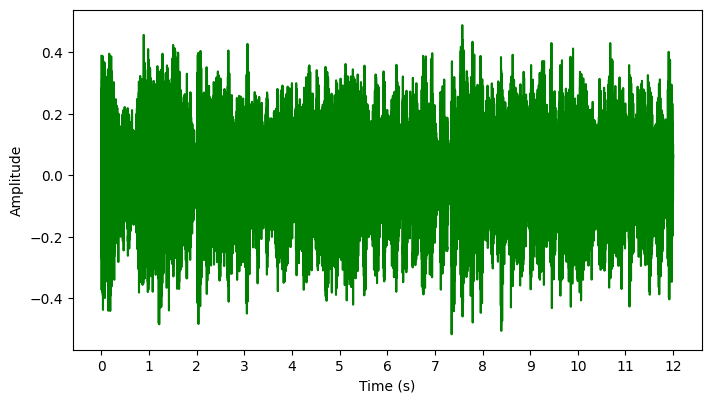

In [3]:
sound, sr = load('./steps.wav')

wavplot(sound, sr)


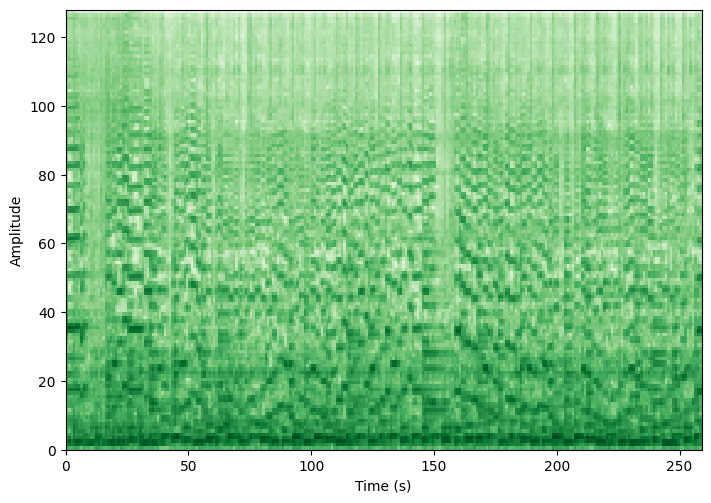

In [8]:
def melspec(s, sr, title='', suptitle=''):
    fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')
    mel_spect = librosa.feature.melspectrogram(y=sound, sr=sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # librosa.display.specshow(mel_spect, y_axis='mel', fmax=8192, x_axis='time')
    ax.pcolormesh(mel_spect, cmap='Greens')

    fig.suptitle(suptitle)
    ax.set_title(title, loc='left', fontstyle='oblique', fontsize='medium')
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time (s)')

melspec(sound, sr)

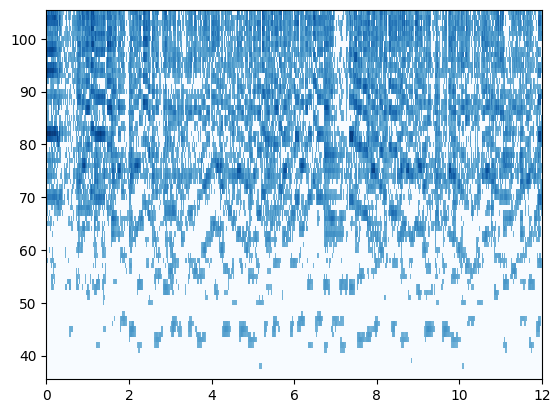

In [24]:
hp = sr // 64
q = abs( cqt( sound, sr=sr, hop_length=hp, fmin=65.406, n_bins=70, bins_per_octave=12))**.2
q = np.linspace( 1, 4, q.shape[0])[:,None] * q
q = (q > np.quantile(q, 0.5)) * (q * 127/q.max()).astype(int) 

plt.pcolormesh(np.arange(q.shape[1]) * hp/sr, np.arange( q.shape[0])+36, q, cmap='Blues')
play(sound, sr)